In [1]:
import pandas as pd
import numpy as np
import polars as pl
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import gzip
import shutil
import pathlib
import os
import sqlalchemy
import sqlite3
import spacy
import re
import tqdm
from  tqdm import tqdm
from tqdm.notebook import tqdm, trange
import ipywidgets as widgets
from ipywidgets import IntProgress, HTML, VBox
from IPython.display import display
import time
import sklearn
from sklearn.preprocessing import LabelEncoder
import missingno as msno
import sqlite3
import pyarrow as pa
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

%matplotlib inline
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
conn = sqlite3.connect('CFPB_LAR.db')
cursor = conn.cursor()

In [3]:
df1_path = r"F:\Data Science\Projects\CFPB LAR Data\2022_public_lar_csv.zip"
df1_parquet_path = r"F:\Data Science\Projects\pythonProject\cfpb_lar_data.parquet"

In [4]:
#pl1 = pl.read_csv(df1_path,low_memory=False)


#pl1 = pl.read_database(query="""
#SELECT *
#FROM CFPB_LAR
#""", connection=conn)

In [5]:
#pl1.to_parquet(path=r"F:\Data Science\Projects\pythonProject\cfpb_lar_data.parquet")

In [4]:
pl1 = pl.read_parquet(df1_parquet_path)

In [5]:
pl1.head()

activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,…,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
i64,str,i64,str,f64,f64,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,i64,str,str,str,str,str,str,str,str,i64,i64,i64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,str,str,str,str,i64,i64,i64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,i64,f64,i64,i64,i64
2022,"""RVDPPPGHCGZ40J…",26420,"""TX""",48201.0,4.8202e10,"""C""","""Conventional:F…","""Single Family …","""Not Hispanic o…","""Asian""","""Male""",1,0,2,1,1,1,2,2,2,215000,"""97.0""","""6.5""","""-0.034""",2,"""7436.14""",null,"""4336.0""",null,"""2703.37""","""360""",null,null,2,2,2,…,26.0,null,null,null,8.0,null,null,null,null,2,4,1,5,2,4,"""25-34""","""9999""","""No""",null,2,1,1,null,null,null,null,10,null,null,null,6907,71.83,90800,80.0,1409,2002,28
2022,"""RVDPPPGHCGZ40J…",19124,"""TX""",48085.0,4.8085e10,"""C""","""FHA:First Lien…","""Single Family …","""Not Hispanic o…","""Black or Afric…","""Male""",1,2,2,2,1,1,2,2,2,445000,"""92.74""","""6.75""","""0.847""",2,"""16155.19""",null,"""4290.4""","""3276.4""",null,"""360""",null,null,2,2,2,…,5.0,null,null,null,6.0,null,null,null,null,2,2,1,3,2,2,"""45-54""","""35-44""","""No""","""No""",2,1,3,null,null,null,null,10,null,null,null,6001,39.96,97400,150.0,1255,1431,14
2022,"""RVDPPPGHCGZ40J…",40900,"""CA""",6017.0,6.0170e9,"""C""","""Conventional:F…","""Single Family …","""Not Hispanic o…","""White""","""Female""",4,0,2,1,1,1,2,2,2,235000,null,null,null,3,null,null,null,null,null,"""360""",null,null,2,2,2,…,null,null,null,null,8.0,null,null,null,null,2,4,2,5,2,4,"""35-44""","""9999""","""No""",null,2,1,6,null,null,null,null,10,null,null,null,2703,39.92,102400,60.0,478,1631,51
2022,"""RVDPPPGHCGZ40J…",25540,"""CT""",9013.0,9.0135e9,"""C""","""FHA:First Lien…","""Single Family …","""Ethnicity Not …","""Race Not Avail…","""Sex Not Availa…",1,2,2,2,1,1,2,2,2,425000,"""91.47""","""7.125""","""1.48""",2,"""22789.69""",null,"""11771.13""",null,"""5624.46""","""360""",null,null,2,2,2,…,null,null,null,null,8.0,null,null,null,null,2,4,3,5,2,4,"""45-54""","""9999""","""No""",null,2,1,3,null,null,null,null,10,null,null,null,3948,8.61,113200,121.0,1271,1507,42
2022,"""RVDPPPGHCGZ40J…",12580,"""MD""",24510.0,2.4510e10,"""C""","""FHA:First Lien…","""Single Family …","""Ethnicity Not …","""Race Not Avail…","""Female""",4,0,2,2,1,1,2,2,2,205000,null,null,null,3,null,null,null,null,null,"""360""",null,null,2,2,2,…,null,null,null,null,8.0,null,null,null,null,2,4,2,5,2,4,"""35-44""","""9999""","""No""",null,2,1,3,null,null,null,null,10,null,null,null,3249,92.34,116100,38.0,444,1500,0


In [8]:
#pl1.to_sql(name='CFPB_LAR',con=conn,if_exists='replace')

16080210

In [9]:
# from polars import DataFrame
#
# df2 = DataFrame(pl1)
#
# arrow_table = df2.to_arrow()
#
# sqlite_connection = pa.Sqlite3Connection('CFPB_LAR.db')
#
# #df2.write_sqlite(name='CFPB_LAR.db',con=conn)
#
# sqlite_connection.create_table('CFPB_LAR', arrow_table,if_exists='replace')

In [10]:
#pl1.to_sql(table_name='CFPB_LAR',con=conn,if_table_exists='replace')

In [11]:
#pl1.write_database(table_name='CFPB_LAR',connection=conn,if_table_exists='replace')

With Polars we can also register a DataFrame with SQL context. This will allow us to query the DataFrame using SQL syntax.

sql = pl.SQLContext()

sql.register('pl1',pl1)

print(sql.query("""
SELECT *
FROM <table_name"""))

In [23]:
#loan_types = pl1.groupby(by='loan_type')

In [27]:
#loan_types.describe()

activity_year                                                       \
                  count    mean  std     min     25%     50%     75%     max   
loan_type                                                                      
1            12745701.0  2022.0  0.0  2022.0  2022.0  2022.0  2022.0  2022.0   
2             2006166.0  2022.0  0.0  2022.0  2022.0  2022.0  2022.0  2022.0   
3             1210205.0  2022.0  0.0  2022.0  2022.0  2022.0  2022.0  2022.0   
4              118138.0  2022.0  0.0  2022.0  2022.0  2022.0  2022.0  2022.0   

          derived_msa_md                ... tract_one_to_four_family_homes  \
                   count          mean  ...                            75%   
loan_type                               ...                                  
1             12745701.0  36982.859064  ...                         2030.0   
2              2006166.0  37895.917335  ...                         2027.0   
3              1210205.0  39241.152839  ...                         2148.0   
4               118138.0  59590.084122  ...                         2076.0   

                  tract_median_age_of_housing_units                        \
              max                             count       mean        std   
loan_type                                                                   
1          8233.0                        12745701.0  35.254971  18.741847   
2          8233.0                         2006166.0  36.702778  18.759026   
3          8233.0                         1210205.0  32.398994  16.240636   
4          8233.0                          118138.0  38.626792  15.598127   

                                        
           min   25%   50%   75%   max  
loan_type                               
1         -1.0  22.0  35.0  48.0  80.0  
2         -1.0  23.0  36.0  50.0  80.0  
3         -1.0  20.0  31.0  43.0  80.0  
4         -1.0  29.0  39.0  48.0  80.0  

[4 rows x 568 columns]

In [29]:
pl1['derived_ethnicity'].value_counts()

derived_ethnicity
Not Hispanic or Latino     10246499
Ethnicity Not Available     3902872
Hispanic or Latino          1577625
Joint                        346072
Free Form Text Only            7142
Name: count, dtype: int64

In [31]:
sns.barplot(pl1['derived_ethnicity'])

ValueError: could not convert string to float: 'Not Hispanic or Latino'

<Axes: xlabel='derived_ethnicity'>

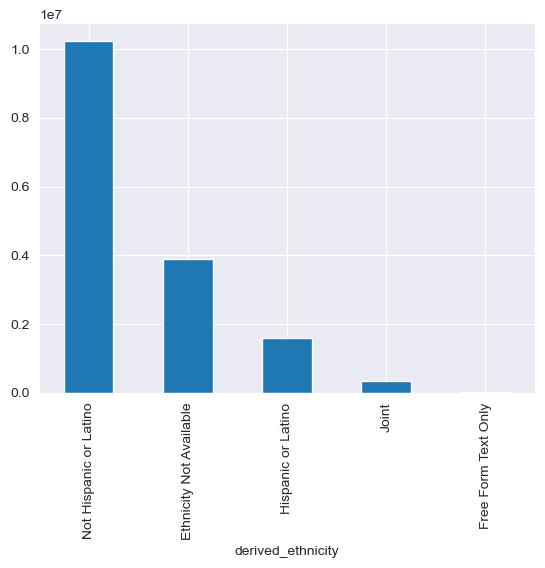

In [33]:
pl1['derived_ethnicity'].value_counts().plot(kind='bar')

In [6]:
null_values = pl1.null_count() / len(pl1) * 100
null_values_s = null_values.to_pandas()
null_values_s = null_values_s.transpose()
null_columns_list = null_values_s[null_values_s > 30]
null_columns_list = null_columns_list.dropna()
null_columns_list = null_columns_list.index

f"Columns sorted by NULL values"
null_values_s.sort_values(by=0,ascending=False)

,0
co_applicant_ethnicity_5,99.999515
co_applicant_ethnicity_4,99.999086
applicant_ethnicity_5,99.998688
applicant_ethnicity_4,99.996294
co_applicant_race_5,99.991636
...,...
total_units,0.000000
applicant_credit_score_type,0.000000
co_applicant_credit_score_type,0.000000
lei,0.000000


In [7]:
pl1 = pl1.drop(null_columns_list)

In [12]:
#pl1 = pl1.drop(['derived_loan_product_type','derived_dwelling_category','derived_ethnicity','derived_race','derived_sex','applicant_age','co_applicant_age','applicant_age_above_62','state_code','conforming_loan_limit','property_value','total_units','literal','lei','derived_msa_md','loan_term'])

In [8]:
pl1 = pl1.drop(['lei','derived_msa_md','loan_term','county_code','census_tract'])
pl1.head()

activity_year,state_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,income,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,co_applicant_race_1,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,denial_reason_1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
i64,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,str,f64,i64,i64,f64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,i64,i64,f64,i64,f64,i64,i64,i64
2022,"""TX""","""C""","""Conventional:F…","""Single Family …","""Not Hispanic o…","""Asian""","""Male""",1,0,2,1,1,1,2,2,2,215000,2,2,2,2,2,"""225000""",1,1,3,5,"""1""",59.0,2,10,2.0,5.0,2,4,2.0,8.0,2,4,1,5,2,4,"""25-34""","""9999""","""No""",2,1,1,10,6907,71.83,90800,80.0,1409,2002,28
2022,"""TX""","""C""","""FHA:First Lien…","""Single Family …","""Not Hispanic o…","""Black or Afric…","""Male""",1,2,2,2,1,1,2,2,2,445000,2,2,2,2,2,"""475000""",1,1,3,5,"""1""",202.0,9,2,2.0,3.0,2,2,3.0,6.0,2,2,1,3,2,2,"""45-54""","""35-44""","""No""",2,1,3,10,6001,39.96,97400,150.0,1255,1431,14
2022,"""CA""","""C""","""Conventional:F…","""Single Family …","""Not Hispanic o…","""White""","""Female""",4,0,2,1,1,1,2,2,2,235000,3,2,2,2,2,null,1,1,3,5,"""1""",138.0,9,9,2.0,5.0,2,4,5.0,8.0,2,4,2,5,2,4,"""35-44""","""9999""","""No""",2,1,6,10,2703,39.92,102400,60.0,478,1631,51
2022,"""CT""","""C""","""FHA:First Lien…","""Single Family …","""Ethnicity Not …","""Race Not Avail…","""Sex Not Availa…",1,2,2,2,1,1,2,2,2,425000,2,2,2,2,2,"""455000""",1,1,3,5,"""1""",150.0,3,10,3.0,5.0,2,4,6.0,8.0,2,4,3,5,2,4,"""45-54""","""9999""","""No""",2,1,3,10,3948,8.61,113200,121.0,1271,1507,42
2022,"""MD""","""C""","""FHA:First Lien…","""Single Family …","""Ethnicity Not …","""Race Not Avail…","""Female""",4,0,2,2,1,1,2,2,2,205000,3,2,2,2,2,null,1,1,3,5,"""1""",75.0,9,9,3.0,5.0,2,4,6.0,8.0,2,4,2,5,2,4,"""35-44""","""9999""","""No""",2,1,3,10,3249,92.34,116100,38.0,444,1500,0


In [61]:
pl1.shape

(16080210, 58)

In [103]:
# Run the below line of code the first time you run this notebook
#pl1 = pl1.drop(['lei','derived_msa_md','county_code','census_tract'])

# from sklearn.preprocessing import OneHotEncoder
# #label_encoder = LabelEncoder()
# one_hot_encoder = OneHotEncoder()
#
# df1 = pl1.to_pandas()
#
# encoded = pd.DataFrame(one_hot_encoder.fit_transform(df1['derived_loan_product_type']))
# encoded = encoded.reshape(-1,1)
# df1 = pd.concat([df1, encoded],axis=1)
#s1 = pl1['conforming_loan_limit'].to_pandas()

#encoded_values = label_encoder.fit_transform(s1)

#encoded_df = pl.DataFrame({'conforming_loan_limit_encoded': encoded_values})

# Create a new Pandas Series with the encoded values
#encoded_series = pl.Series('conforming_loan_limit_encoded', encoded_values)

# Add the new column to the original DataFrame
#pl1 = pl1.with_columns(pl.col('conforming_loan_limit_encoded', encoded_series.to_list()))

#pl1['conforming_loan_limit_encoded'] = encoded_df['conforming_loan_limit_encoded'].cast(str)

#pl1 = pl1.with_columns('conforming_load_limit_2', label_encoder.fit_transform(pl1['conforming_loan_limit']))


#pl1 = pl1.with_columns(pl.col('conforming_loan_limit_encoded', encoded_df['conforming_loan_limit_encoded'].cast(str)))

#pl1 = pl1.extend(encoded_df)

#pl1 = pl.concat([pl1, encoded_df], axis=1)

#pl1 = pl1.join(encoded_df, on=pl1['conforming_loan_limit'] == encoded_df['conforming_loan_limit_encoded']).drop('conforming_loan_limit_encoded')

#pl1 = pl1.with_columns(pl.col('conforming_loan_limit_encoded', encoded_values))

#pl1['state_code_encoded'] = encoded_values

#pl1.head(25)

ValueError: Expected 2D array, got 1D array instead:
array=['Conventional:First Lien' 'FHA:First Lien' 'Conventional:First Lien' ...
 'FHA:First Lien' 'Conventional:First Lien' 'Conventional:First Lien'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [109]:
# encoded = pd.DataFrame(one_hot_encoder.fit_transform(df1['derived_loan_product_type'].values.reshape(-1,1)))
# encoded

,0
0,"(0, 0)\t1.0"
1,"(0, 2)\t1.0"
2,"(0, 0)\t1.0"
3,"(0, 2)\t1.0"
4,"(0, 2)\t1.0"
...,...
16080205,"(0, 0)\t1.0"
16080206,"(0, 2)\t1.0"
16080207,"(0, 2)\t1.0"
16080208,"(0, 0)\t1.0"


In [127]:
#df1.head()


#pl1 = pl1.with_columns(pl.when(pl1['property_value'] == 'None').then(0).otherwise(pl1['property_value']))
#pl1 = pl1.with_columns(pl.when(pl1['property_value'] == '"Exempt"').then(0).otherwise(pl1['property_value']))
#pl1['property_value'] = pl1['property_value'].cast(float)


In [9]:
encoder = LabelEncoder()

In [63]:
def encode_data(pl1):
    state_code_enc = encoder.fit_transform(pl1['state_code'])
    derived_loan_enc = encoder.fit_transform(pl1['derived_loan_product_type'])
    derived_ethnicity_enc = encoder.fit_transform(pl1['derived_ethnicity'])
    derived_race_enc = encoder.fit_transform(pl1['derived_race'])
    derived_sex_enc = encoder.fit_transform(pl1['derived_sex'])
    derived_product_type_enc = encoder.fit_transform(pl1['derived_loan_product_type'])
    derived_dwelling_enc = encoder.fit_transform(pl1['derived_dwelling_category'])

    state_code_s = pl.Series('state_code_s',state_code_enc)
    derived_loan_s = pl.Series('derived_dwelling_s',derived_loan_enc)
    derived_ethnicity_s = pl.Series('derived_ethnicity_s',derived_ethnicity_enc)
    derived_race_s = pl.Series('derived_race_s',derived_race_enc)
    derived_sex_s = pl.Series('derived_sex_s',derived_sex_enc)
    encoded_array = pl.Series('derived_loan_product_type_enc', derived_product_type_enc)
    derived_dwelling_s = pl.Series('derived_dwelling_s', derived_dwelling_enc)

    pl1 = pl1.with_columns(state_code_s)
    pl1 = pl1.with_columns(derived_loan_s)
    pl1 = pl1.with_columns(derived_ethnicity_s)
    pl1 = pl1.with_columns(derived_race_s)
    pl1 = pl1.with_columns(derived_sex_s)
    pl1 = pl1.with_columns(encoded_array)
    pl1 = pl1.with_columns(derived_dwelling_s)

    return pl1

In [64]:
pl1 = encode_data(pl1)

In [30]:
pl1.head(10)

activity_year,state_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,income,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,co_applicant_ethnicity_1,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,co_applicant_race_1,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,denial_reason_1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units,derived_loan_product_type_enc,state_code_s,derived_dwelling_s,derived_ethnicity_s,derived_race_s,derived_sex_s
i64,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64,str,f64,i64,i64,f64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,i64,i64,f64,i64,f64,i64,i64,i64,i64,i32,i64,i64,i64,i64
2022,"""TX""","""C""","""Conventional:F…","""Single Family …","""Not Hispanic o…","""Asian""","""Male""",1,0,2,1,1,1,2,2,2,215000,2,2,2,2,2,"""225000""",1,1,3,5,"""1""",59.0,2,10,2.0,5.0,2,4,2.0,8.0,2,4,1,5,2,4,"""25-34""","""9999""","""No""",2,1,1,10,6907,71.83,90800,80.0,1409,2002,28,0,46,3,4,2,2
2022,"""TX""","""C""","""FHA:First Lien…","""Single Family …","""Not Hispanic o…","""Black or Afric…","""Male""",1,2,2,2,1,1,2,2,2,445000,2,2,2,2,2,"""475000""",1,1,3,5,"""1""",202.0,9,2,2.0,3.0,2,2,3.0,6.0,2,2,1,3,2,2,"""45-54""","""35-44""","""No""",2,1,3,10,6001,39.96,97400,150.0,1255,1431,14,2,46,3,4,3,2
2022,"""CA""","""C""","""Conventional:F…","""Single Family …","""Not Hispanic o…","""White""","""Female""",4,0,2,1,1,1,2,2,2,235000,3,2,2,2,2,null,1,1,3,5,"""1""",138.0,9,9,2.0,5.0,2,4,5.0,8.0,2,4,2,5,2,4,"""35-44""","""9999""","""No""",2,1,6,10,2703,39.92,102400,60.0,478,1631,51,0,5,3,4,8,0
2022,"""CT""","""C""","""FHA:First Lien…","""Single Family …","""Ethnicity Not …","""Race Not Avail…","""Sex Not Availa…",1,2,2,2,1,1,2,2,2,425000,2,2,2,2,2,"""455000""",1,1,3,5,"""1""",150.0,3,10,3.0,5.0,2,4,6.0,8.0,2,4,3,5,2,4,"""45-54""","""9999""","""No""",2,1,3,10,3948,8.61,113200,121.0,1271,1507,42,2,7,3,0,7,3
2022,"""MD""","""C""","""FHA:First Lien…","""Single Family …","""Ethnicity Not …","""Race Not Avail…","""Female""",4,0,2,2,1,1,2,2,2,205000,3,2,2,2,2,null,1,1,3,5,"""1""",75.0,9,9,3.0,5.0,2,4,6.0,8.0,2,4,2,5,2,4,"""35-44""","""9999""","""No""",2,1,3,10,3249,92.34,116100,38.0,444,1500,0,2,22,3,0,7,0
2022,"""OH""","""C""","""FHA:First Lien…","""Single Family …","""Not Hispanic o…","""Black or Afric…","""Male""",3,0,2,2,1,1,2,2,2,385000,3,2,2,2,2,"""415000""",1,1,3,5,"""1""",139.0,1,10,2.0,5.0,2,4,3.0,8.0,2,4,1,5,2,4,"""45-54""","""9999""","""No""",2,1,3,1,8077,28.95,82000,166.0,2936,3210,18,2,37,3,4,3,2
2022,"""NJ""","""C""","""Conventional:F…","""Single Family …","""Ethnicity Not …","""Race Not Avail…","""Joint""",1,0,2,1,1,1,2,2,2,85000,2,2,2,2,2,"""115000""",1,1,3,5,"""1""",68.0,9,1,3.0,3.0,2,2,6.0,6.0,2,2,2,1,2,2,""">74""","""55-64""","""Yes""",2,1,1,10,7573,38.57,112900,97.0,1955,1865,57,0,33,3,0,7,1
2022,"""FL""","""C""","""Conventional:F…","""Single Family …","""Not Hispanic o…","""White""","""Male""",1,3,2,1,1,1,2,2,2,455000,2,2,2,2,2,"""515000""",1,1,3,5,"""1""",133.0,9,3,2.0,2.0,2,2,5.0,5.0,2,2,1,1,2,2,"""45-54""","""45-54""","""No""",2,1,1,10,5249,95.64,

In [10]:
text_cols = []
numeric_cols = []

for i in pl1.columns:
    #print(i,type(i))
    if pl1[i].dtype == pl.Utf8:
        text_cols.append(i)
    elif pl1[i].dtype == pl.Int64:
        numeric_cols.append(i)
    elif pl1[i].dtype == pl.Float64:
        numeric_cols.append(i)
    else:
        pass


In [11]:
print('Numeric columns count:', len(numeric_cols))
print('Text columns count:', len(text_cols))

Numeric columns count: 46
Text columns count: 12


In [12]:
pl1 = pl1[numeric_cols]

In [28]:
from sklearn.utils import shuffle


vectorizer = TfidfVectorizer()


target_col = 'action_taken'

# if target_col in numeric_cols:
#     numeric_cols.remove(target_col)
# elif target_col in text_cols:
#     text_cols.remove(target_col)
# else:
#     pass

#target_col_enc = encoder.fit_transform(pl1[target_col])
#target_col = pl.Series(f"{target_col}", target_col_enc)
#pl1 = pl1.with_columns(target_col)

X = pl1.drop(target_col).to_pandas()
y = pl1[target_col].to_pandas()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5,random_state=42)



#X_train_text = vectorizer.fit_transform(X_train[text_cols])
#X_test_text = vectorizer.transform(X_test[text_cols])

#X_train_numeric = X_train[numeric_cols].values
#X_test_numeric = X_test[numeric_cols].values

#X_train_text_test = encoder.fit_transform(X_train_text.toarray())
#X_test_text_test = encoder.transform(X_test_text.toarray())

# X_train = np.hstack((X_train_text.toarray(), X_train_numeric))
# X_test = np.hstack((X_test_text.toarray(), X_test_numeric))

#print("Shape of X_train_text:", X_train_text.toarray().shape)
#print("Shape of X_train_numeric:", X_train_numeric.shape)




X_train, y_train = shuffle(X_train,y_train, random_state=42)
#y_train = encoder.fit_transform(y_train)

In [14]:
from sklearn.ensemble import HistGradientBoostingClassifier

#classifier = RandomForestClassifier(random_state=42)

classifier = HistGradientBoostingClassifier(random_state=42)
xgbc_model = XGBClassifier()
# X = pl1.drop('action_taken').to_pandas()
# y = pl1['action_taken'].to_pandas()

#X = pl1.drop('action_taken')
#y = pl1['action_taken']

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5,random_state=42)

In [29]:
with tqdm(total=len(X_train), desc='Training') as pbar:
    classifier.fit(X_train.values,y_train)
    #xgbc_model.fit(X_train.values,y_train)
    pbar.update(len(X_train))

Training:   0%|          | 0/8040105 [00:00<?, ?it/s]

In [30]:
with tqdm(total=len(X_test), desc='Training') as pbar:
    predictions = classifier.predict(X_test)
    #xgbc_predictions = xgbc_model.predict(X_test)
    pbar.update(len(X_test))

Training:   0%|          | 0/8040105 [00:00<?, ?it/s]

C:\Users\asl4a\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [31]:
random_forest_accuracy = accuracy_score(y_test, predictions)
#xgboost_model_accuracy = accuracy_score(y_test, xgbc_predictions)
print(f'RandomForestClassifier Accuracy: {random_forest_accuracy}')
#print(f'XGBoost Classifier Accuracy : {xgboost_model_accuracy}')

RandomForestClassifier Accuracy: 0.942837562444769


In [25]:
random_forest_accuracy = accuracy_score(y_test, predictions)
xgboost_model_accuracy = accuracy_score(y_test, xgbc_predictions)
print(f'RandomForestClassifier Accuracy: {random_forest_accuracy}')
print(f'XGBoost Classifier Accuracy : {xgboost_model_accuracy}')

RandomForestClassifier Accuracy: 0.004846454119691223
XGBoost Classifier Accuracy : 0.006250291507387031


In [22]:
from sklearn.metrics import confusion_matrix

y_preds_transformed = encoder.inverse_transform(xgbc_predictions)

cm = confusion_matrix(y_test,y_preds_transformed)

cm / len(y_preds_transformed) * 100

array([[5.19316352e+01, 1.54052714e-01, 1.54475595e-02, 9.03968294e-02,
        7.58696559e-04, 2.05221200e-03, 3.73129455e-05, 2.15171319e-03],
       [2.29860182e-01, 2.19443652e+00, 1.80843409e-02, 9.34689286e-02,
        2.21514520e-02, 1.24376485e-05, 1.99002376e-04, 3.54348606e-02],
       [1.71763926e-02, 2.86065916e-04, 1.54793252e+01, 2.88304693e-02,
        3.73129455e-05, 2.48752970e-05, 0.00000000e+00, 0.00000000e+00],
       [5.00988482e-02, 1.08207542e-03, 4.26238215e-02, 1.33021148e+01,
        4.20765649e-01, 4.97505941e-05, 0.00000000e+00, 0.00000000e+00],
       [4.48999111e-03, 9.95011881e-04, 9.31579874e-03, 3.79675390e+00,
        1.11411480e+00, 1.24376485e-05, 0.00000000e+00, 0.00000000e+00],
       [1.11068201e-02, 0.00000000e+00, 2.48752970e-05, 2.73628267e-04,
        0.00000000e+00, 9.67499803e+00, 0.00000000e+00, 0.00000000e+00],
       [7.46258911e-05, 1.61689431e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.46598645e-01, 3.

In [35]:
from sklearn.metrics import confusion_matrix

#y_preds_transformed = encoder.inverse_transform(predictions)

#cm = confusion_matrix(y_test,y_preds_transformed)

cm = confusion_matrix(y_test,predictions)
cm / len(y_preds_transformed) * 100

array([[5.18211516e+01, 2.39101355e-01, 1.90544775e-02, 1.08170229e-01,
        6.09444777e-04, 2.49996735e-03, 6.59195371e-04, 5.28600062e-03],
       [2.83777388e-01, 2.10201235e+00, 1.95146705e-02, 1.01715090e-01,
        1.52485571e-02, 2.48752970e-05, 4.22880049e-04, 7.09319095e-02],
       [2.12061907e-02, 1.57958136e-03, 1.54517385e+01, 2.43653534e-02,
        0.00000000e+00, 6.21882426e-05, 2.67285067e-02, 0.00000000e+00],
       [6.40538898e-02, 1.10695072e-03, 4.88923963e-02, 1.35038908e+01,
        1.98243680e-01, 7.46258911e-05, 2.48752970e-04, 2.23877673e-04],
       [4.17904990e-03, 2.61190619e-04, 9.90036822e-03, 4.14717221e+00,
        7.63845746e-01, 1.24376485e-05, 2.11440025e-04, 9.95011881e-05],
       [1.29600298e-02, 0.00000000e+00, 2.48752970e-05, 2.98503564e-04,
        0.00000000e+00, 9.67311994e+00, 0.00000000e+00, 0.00000000e+00],
       [1.94027317e-03, 9.82574233e-04, 2.54785230e-01, 1.86564728e-04,
        0.00000000e+00, 0.00000000e+00, 1.88815942e-01, 3.

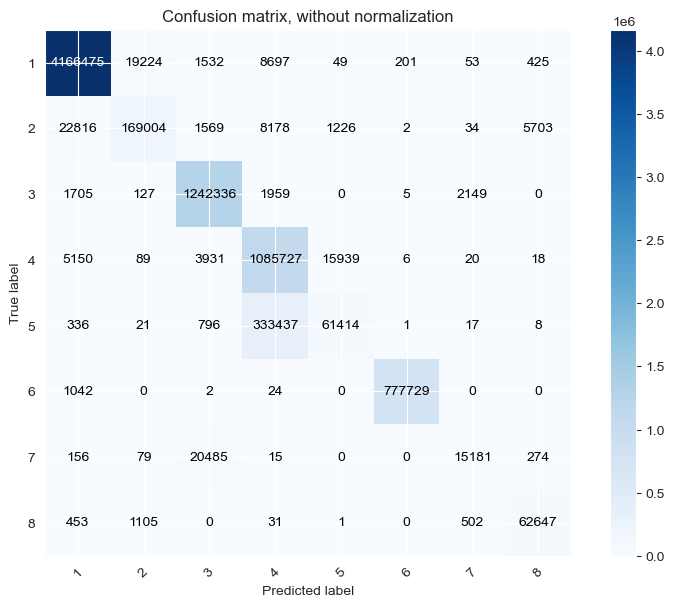

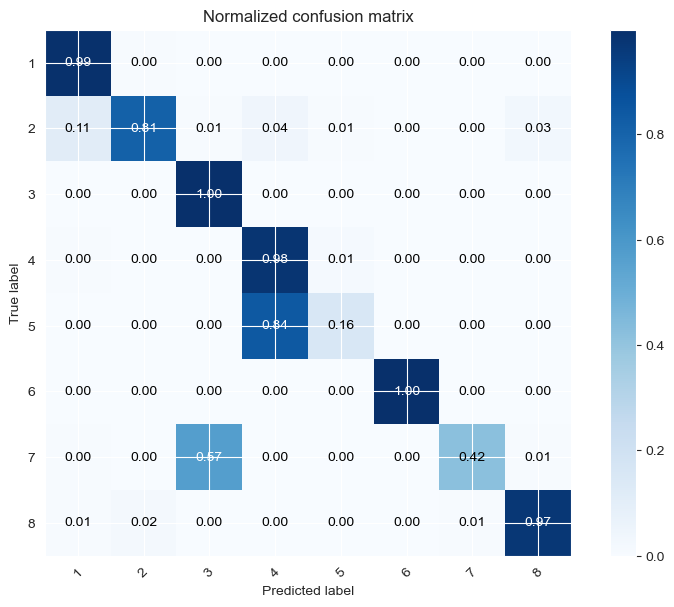

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = predictions

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Example usage:
# Assuming y_true and y_pred are your true labels and predicted labels respectively.
# classes is a list of class names.

# Sample data:
#y_true = [2, 0, 2, 2, 0, 1]
#y_pred = [0, 0, 2, 2, 0, 2]
#classes = ['Class 0', 'Class 1', 'Class 2']
classes = np.unique(y_test)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=classes)

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=classes, normalize=True)


In [23]:
len(predictions)

8040105

In [24]:
classifier.feature_names_in_

array(['activity_year', 'purchaser_type', 'preapproval', 'loan_type',
       'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open_end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'hoepa_status', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'income',
       'applicant_credit_score_type', 'co_applicant_credit_score_type',
       'applicant_ethnicity_1', 'co_applicant_ethnicity_1',
       'applicant_ethnicity_observed', 'co_applicant_ethnicity_observed',
       'applicant_race_1', 'co_applicant_race_1',
       'applicant_race_observed', 'co_applicant_race_observed',
       'applicant_sex', 'co_applicant_sex', 'applicant_sex_observed',
       'co_applicant_sex_observed', 'submission_of_application',
       'initially_payable_to_institution', '

In [28]:
classifier.classes_

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [30]:
classifier.decision_function(X_train)

array([[ 3.78812223, -1.72754563, -0.08514209, ..., -0.52576098,
        -3.54116135, -2.94428286],
       [ 0.82392547, -1.73166388,  3.50397714, ..., -0.52576098,
        -3.54116135, -2.94428286],
       [ 0.81519939, -1.53140905, -0.0950115 , ..., -0.52576098,
        -3.54111163, -2.94428286],
       ...,
       [ 3.0693413 ,  0.05159924, -0.0950115 , ..., -0.48888784,
        -3.53887072, -2.94428286],
       [ 0.86573505, -1.43970049, -0.0950115 , ...,  3.5108735 ,
        -3.54116135, -2.94428286],
       [ 0.81519939, -1.34083941, -0.0950115 , ..., -0.52576098,
        -3.54111163, -2.94428286]])

In [31]:
classifier.get_params(deep=True)

{'categorical_features': None,
 'class_weight': None,
 'early_stopping': 'auto',
 'interaction_cst': None,
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': 42,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [32]:
classifier.predict_proba(X_test)

array([[6.03415256e-02, 4.66712157e-03, 2.40020973e-02, ...,
        8.79155374e-01, 7.61037078e-04, 1.38237811e-03],
       [9.38356688e-01, 3.77523366e-03, 1.95088033e-02, ...,
        1.25566064e-02, 6.15602733e-04, 1.11820536e-03],
       [9.39094117e-02, 8.98648850e-03, 3.77928420e-02, ...,
        2.45661687e-02, 1.20438598e-03, 2.18769473e-03],
       ...,
       [9.38356688e-01, 3.77523366e-03, 1.95088033e-02, ...,
        1.25566064e-02, 6.15602733e-04, 1.11820536e-03],
       [9.38356688e-01, 3.77523366e-03, 1.95088033e-02, ...,
        1.25566064e-02, 6.15602733e-04, 1.11820536e-03],
       [6.08976348e-02, 4.71787001e-03, 8.86249447e-01, ...,
        1.57566159e-02, 7.72525454e-04, 1.40317629e-03]])